In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json

from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, optimizers, callbacks, metrics
from tensorflow.keras import backend as K, initializers, regularizers, constraints
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from tensorflow.keras.layers import Concatenate, Bidirectional, ELU, LSTM, Activation, Dense, Dropout, Input, Embedding, Concatenate, Dense, Conv1D, AveragePooling1D, MaxPooling1D, Flatten, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 🎯 **Step 1: Load Dataset**
---

In [ ]:
path = '/content/drive/MyDrive/TUGAS AKHIR/Notebook/TESTING/URL/DATASET_TES_URL2.xlsx'

df_url = pd.read_excel(path)

df_url.head()

,Data,Kategori
0,https://layer2-rpc-wallet.pages.dev,phishing
1,\thttps://aol912345.weebly.com/,phishing
2,https://7421lorianne.wixstudio.io/mysiteattmai...,phishing
3,https://dickertusc.wixsite.com/my-site-1,phishing
4,https://microsoft-102764verification.weeblysit...,phishing


In [ ]:
urls = df_url['Data'].tolist()

In [ ]:
y = df_url['Kategori']

position_mapping = {'phishing': 1, 'non-phishing': 0}

y = y.map(position_mapping)

# y

# 🎯 **Step 2: Preprocessing**
---

In [ ]:
# with open('/content/drive/MyDrive/TUGAS AKHIR/Notebook/URL/CNN/RANDOM DATA/PREPROCESS/tokenizer_char_level_random_after_preprocess.json', 'r', encoding='utf-8') as f:
#     tokenizer_config = json.load(f)

with open('/content/drive/MyDrive/TUGAS AKHIR/Notebook/URL/Tokenizer/new_tokenizer_char_level.json', 'r', encoding='utf-8') as f:
    tokenizer_config = json.load(f)

tokenizer_char_level = tokenizer_from_json(tokenizer_config)

In [ ]:
# with open('/content/drive/MyDrive/TUGAS AKHIR/Notebook/URL/CNN/RANDOM DATA/PREPROCESS/tokenizer_word_level_after_preprocess.json', 'r', encoding='utf-8') as f:
#     tokenizer_config = json.load(f)

with open('/content/drive/MyDrive/TUGAS AKHIR/Notebook/URL/Tokenizer/new_tokenizer_word_level.json', 'r', encoding='utf-8') as f:
    tokenizer_config = json.load(f)

tokenizer_word_level = tokenizer_from_json(tokenizer_config)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_global(url):

    # url = url.lower()

    # url = re.sub(r'https?://', '', url)

    # url = re.sub(r'www\.', '', url)

    # url = re.sub(r'\.+', ' ', url)

    # url = re.sub(r'[^a-zA-Z0-9\s]', ' ', url) #remove emoji

    # url = url.strip()

    # url = word_tokenize(url)

    # listStopwords = set(stopwords.words('english'))

    # filtered = []

    # for link in url:

    #     if link not in listStopwords:

    #         filtered.append(link)

    # url = filtered

    # lemmatizer = WordNetLemmatizer()
    # lemmatized_text = []

    # for link in url:
    #     lemmatized_text.append(lemmatizer.lemmatize(link))

    # url = ' '.join(lemmatized_text)
    # return url

    return str(url)

def preprocess_char_level(url):
    # print(f'Char Level: {url}')
    X_cl_sequences = tokenizer_char_level.texts_to_sequences(url)
    X_cl_padded = pad_sequences(X_cl_sequences, padding='post', truncating='post', maxlen=1000)

    return X_cl_padded

def preprocess_word_level(url):
    # print(f'Word Level: {url}')
    X_wl_sequences =  tokenizer_word_level.texts_to_sequences(url)
    X_wl_padded = pad_sequences(X_wl_sequences, padding='post', truncating='post', maxlen=1000)

    return X_wl_padded


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
url_clean = [preprocess_global(url) for url in urls]

url_char_level = preprocess_char_level(url_clean)
print(url_char_level)
url_word_level = preprocess_word_level(url_clean)
print(url_word_level)

[[ 13   2   2 ...   0   0   0]
 [104  13   2 ...   0   0   0]
 [ 13   2   2 ...   0   0   0]
 ...
 [ 13   2   2 ...   0   0   0]
 [104  13   2 ...   0   0   0]
 [ 13   2   2 ...   0   0   0]]
[[     2 133006  10318 ...      0      0      0]
 [     2      1     67 ...      0      0      0]
 [     2      1   6721 ...      0      0      0]
 ...
 [     2      4 129585 ...      0      0      0]
 [     2      4  14228 ...      0      0      0]
 [     2  10423     15 ...      0      0      0]]


In [ ]:
inputs = [url_char_level, url_word_level]

# 🎯 **Step 3: Load Model**
---

In [ ]:
import tensorflow as tf

def load_model(paths):
    models = []

    for path in paths:
        model = tf.keras.models.load_model(path)
        models.append(model)

    return models

In [ ]:
# paths_best_model = [
#     '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v1_CNN_LSTM_Multi Head Attention_Model_Random_After_Preprocess_Hyperparameter_Tuning(Best_Model).h5',
#     '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v1_CNN_BiLSTM_Multi Head Attention_Model_Random_After_Preprocess_Hyperparameter_Tuning(Best_Model).h5',
#     '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v2_CNN_LSTM_Multi Head Attention_Model_Random_After_Preprocess_Hyperparameter_Tuning(Best_Model).h5',
#     # '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v2_CNN_BiLSTM_Multi Head Attention_Model_Random_After_Preprocess_Hyperparameter_Tuning(Best_Model).h5'
# ]

# best_model = load_model(paths_best_model)

In [ ]:
paths_best_model_train_again = [
    # # '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v1_CNN_LSTM_Hierarchical Attention_Model_Random_After_Preprocess_Hyperparameter_Tuning.h5',
    # # '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v1_CNN_BiLSTM_Multi Head Attention_Model_Random_After_Preprocess_Hyperparameter_Tuning_1.h5',
    # # '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v2_CNN_LSTM_Multi Head Attention_Model_Random_After_Preprocess_Hyperparameter_Tuning_1.h5',
    # # '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v2_CNN_BiLSTM_Multi Head Attention_Model_Random_After_Preprocess_Hyperparameter_Tuning_1.h5'
    # '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v1_CNN_LSTM_Multi Head Attention_Model_Hyperparameter_Tuning_1.h5',
    # '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v1_CNN_BiLSTM_Multi Head Attention_Model_Hyperparameter_Tuning_1(Best_Model).h5',
    # '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v2_CNN_LSTM_Multi Head Attention_Model_Hyperparameter_Tuning_1.h5',
    # # '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v1_CNN_LSTM_Multi Head Attention_Model_Random_After_Preprocess_Hyperparameter_Tuning_2.h5',
    # '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v1_CNN_LSTM_Multi Head Attention_Model_Random_After_Preprocess_Hyperparameter_Tuning_2.h5'
    '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v1_CNN_LSTM_Multi Head Attention_Model_Hyperparameter_Tuning_1.h5',
    '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v1_CNN_BiLSTM_Multi Head Attention_Model_Hyperparameter_Tuning_1(Best_Model).h5',
    '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v2_CNN_LSTM_Multi Head Attention_Model_Hyperparameter_Tuning_1.h5',
    '/content/drive/MyDrive/TUGAS AKHIR/Model/URL_Embedding_v2_CNN_BiLSTM_Multi Head Attention_Model_Hyperparameter_Tuning_1.h5'
]

best_model_train = load_model(paths_best_model_train_again)

# 🎯 **Step 4: Predict**
---

In [ ]:
def plot_pie_chart(model_predictions, model_name):
    phishing_actual = df_url['Kategori'] == 'phishing'
    non_phishing_actual = ~phishing_actual

    phishing_predicted_phishing = (phishing_actual & (model_predictions == 1)).sum()
    phishing_predicted_non_phishing = (phishing_actual & (model_predictions == 0)).sum()
    non_phishing_predicted_phishing = (non_phishing_actual & (model_predictions == 1)).sum()
    non_phishing_predicted_non_phishing = (non_phishing_actual & (model_predictions == 0)).sum()

    labels = ['Phishing Diprediksi Phishing', 'Phishing Diprediksi Non-Phishing',
              'Non-Phishing Diprediksi Phishing', 'Non-Phishing Diprediksi Non-Phishing']
    sizes = [phishing_predicted_phishing, phishing_predicted_non_phishing,
             non_phishing_predicted_phishing, non_phishing_predicted_non_phishing]
    colors = ['#FF2567', '#FF7D97', '#9CECC5', '#39D98A']
    explode = (0, 0, 0, 0)  # hanya meledakkan bagian pertama

    plt.figure(figsize=(10, 6))
    wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', startangle=140)
    for autotext in autotexts:
        autotext.set_fontsize(16)
        autotext.set_fontweight('bold')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Hasil Prediksi {model_name}')
    plt.show()

In [ ]:
colors_list = [
    ['#FFD700', '#ADFF2F', '#F08080', '#87CEFA'],
    ['#FF0000', '#0000FF', '#008000', '#FFA500'],
    ['#800080', '#00FFFF', '#FF00FF', '#00FF00']
]

In [ ]:
def ensemble_predict(models, inputs, threshold=0.5):
    predictions_probs = [model.predict(inputs) for model in models]
    predictions = [(pred_prob > threshold).astype(int) for pred_prob in predictions_probs]

    return predictions

In [ ]:
# prediksi = ensemble_predict(best_model, inputs)

In [ ]:
# for i, pred in enumerate(prediksi):
#     df_url[f'Best Model {i+1}'] = pred

In [ ]:
# for i in range(1, 4):
#     plot_pie_chart(df_url[f'Best Model {i}'], f'Best Model {i}')

In [ ]:
prediksi_train = ensemble_predict(best_model_train, inputs)

2/2 [==============================] - 1s 111ms/step


In [ ]:
for i, pred in enumerate(prediksi_train):
    df_url[f'Model {i+1}'] = pred

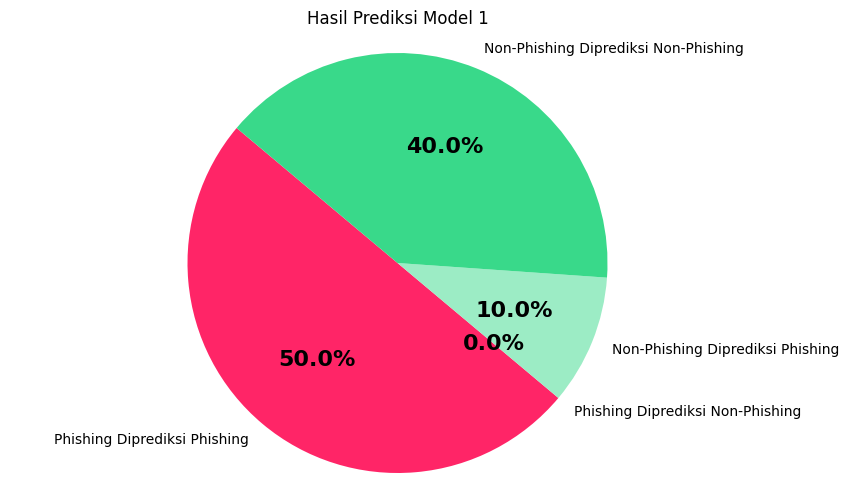

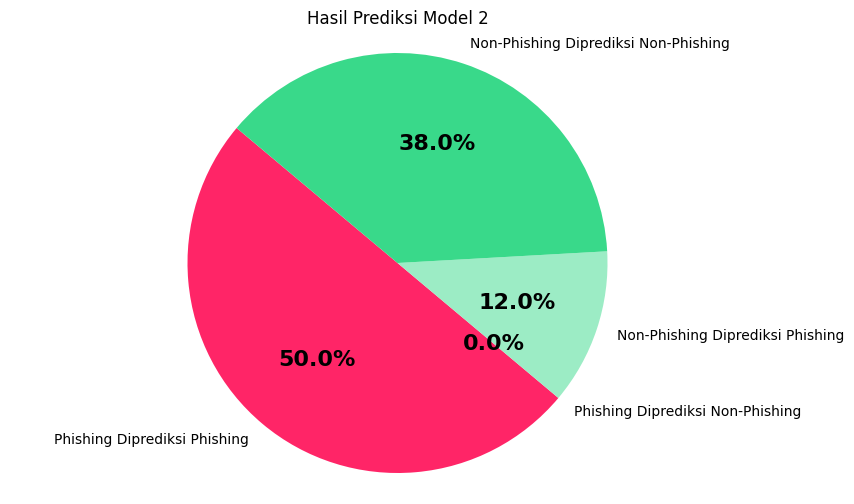

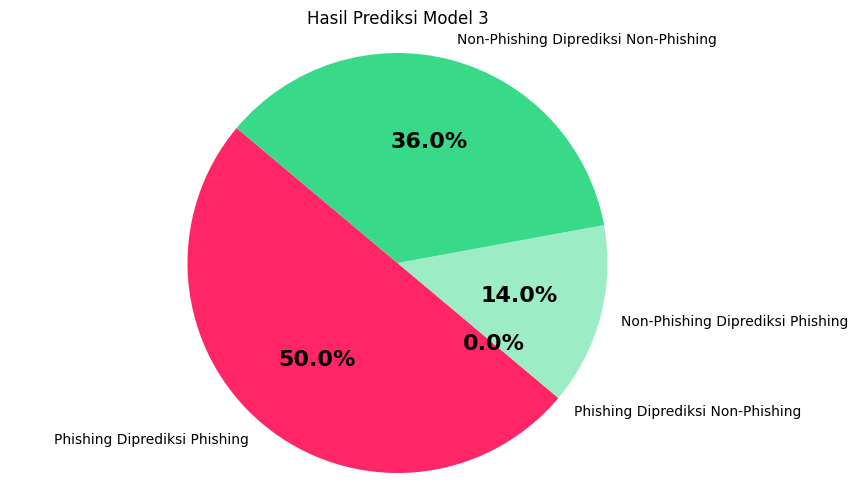

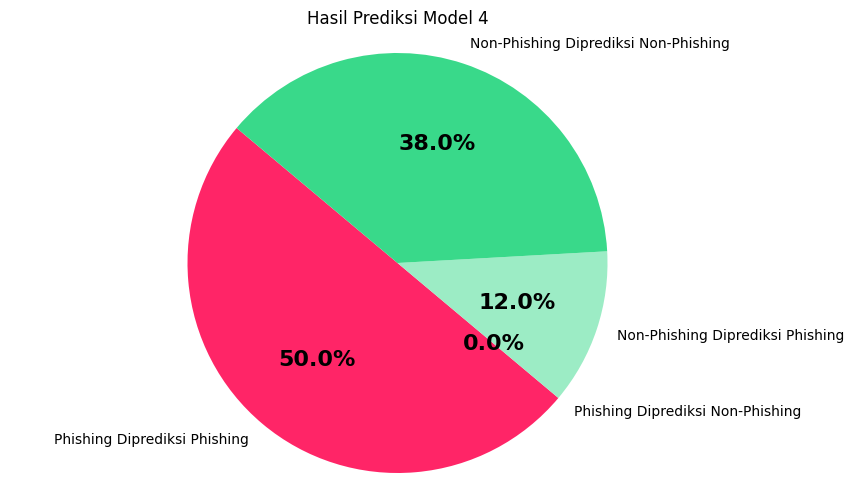

In [ ]:
for i in range(1, 5):
    plot_pie_chart(df_url[f'Model {i}'], f'Model {i}')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model_predictions, model_name):
    actual = df_url['Kategori'].apply(lambda x: 1 if x == 'phishing' else 0)
    cm = confusion_matrix(actual, model_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Phishing', 'Phishing'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix {model_name}')
    plt.show()

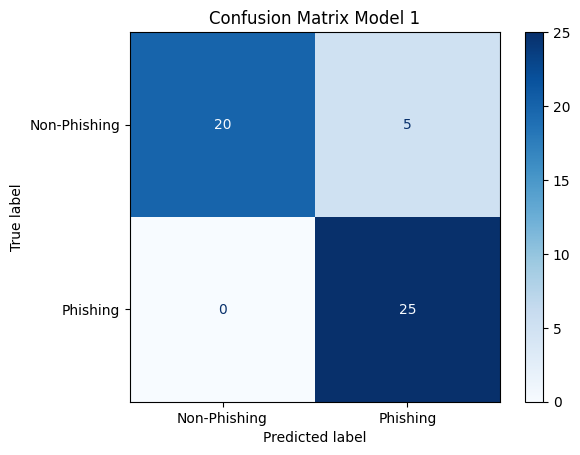

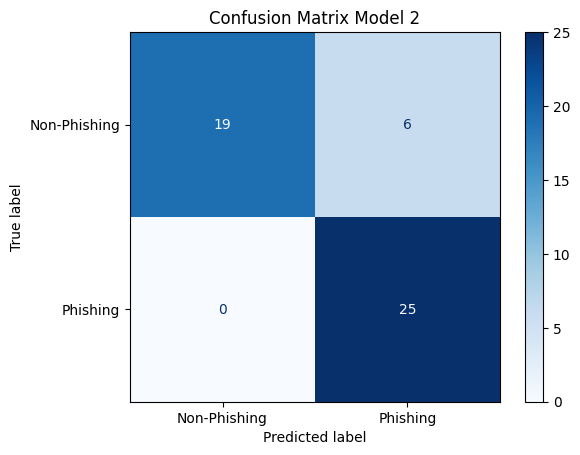

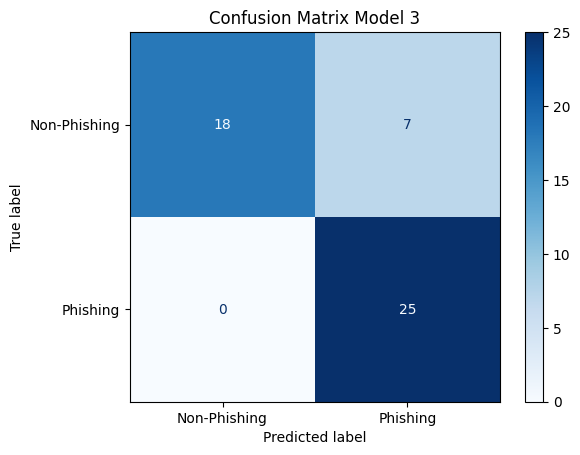

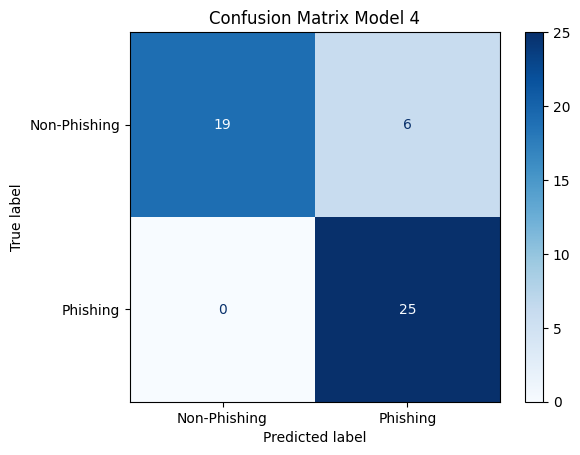

In [ ]:
for i in range(1, 5):
    plot_confusion_matrix(df_url[f'Model {i}'], f'Model {i}')

In [ ]:
display(df_url)

,Data,Kategori,Model 1,Model 2,Model 3,Model 4
0,https://layer2-rpc-wallet.pages.dev,phishing,1,1,1,1
1,\thttps://aol912345.weebly.com/,phishing,1,1,1,1
2,https://7421lorianne.wixstudio.io/mysiteattmai...,phishing,1,1,1,1
3,https://dickertusc.wixsite.com/my-site-1,phishing,1,1,1,1
4,https://microsoft-102764verification.weeblysit...,phishing,1,1,1,1
5,\thttps://home-105703.weeblysite.com/,phishing,1,1,1,1
6,https://homlely.weeblysite.com/,phishing,1,1,1,1
7,https://docs.google.com/presentation/d/e/2PACX...,phishing,1,1,1,1
8,https://docs.google.com/presentation/d/e/2PACX...,phishing,1,1,1,1
9,https://massachvssetts-uiupdate.0rg.us/login?t...,phishing,1,1,1,1
